**PID-Controller Feedback Gain**

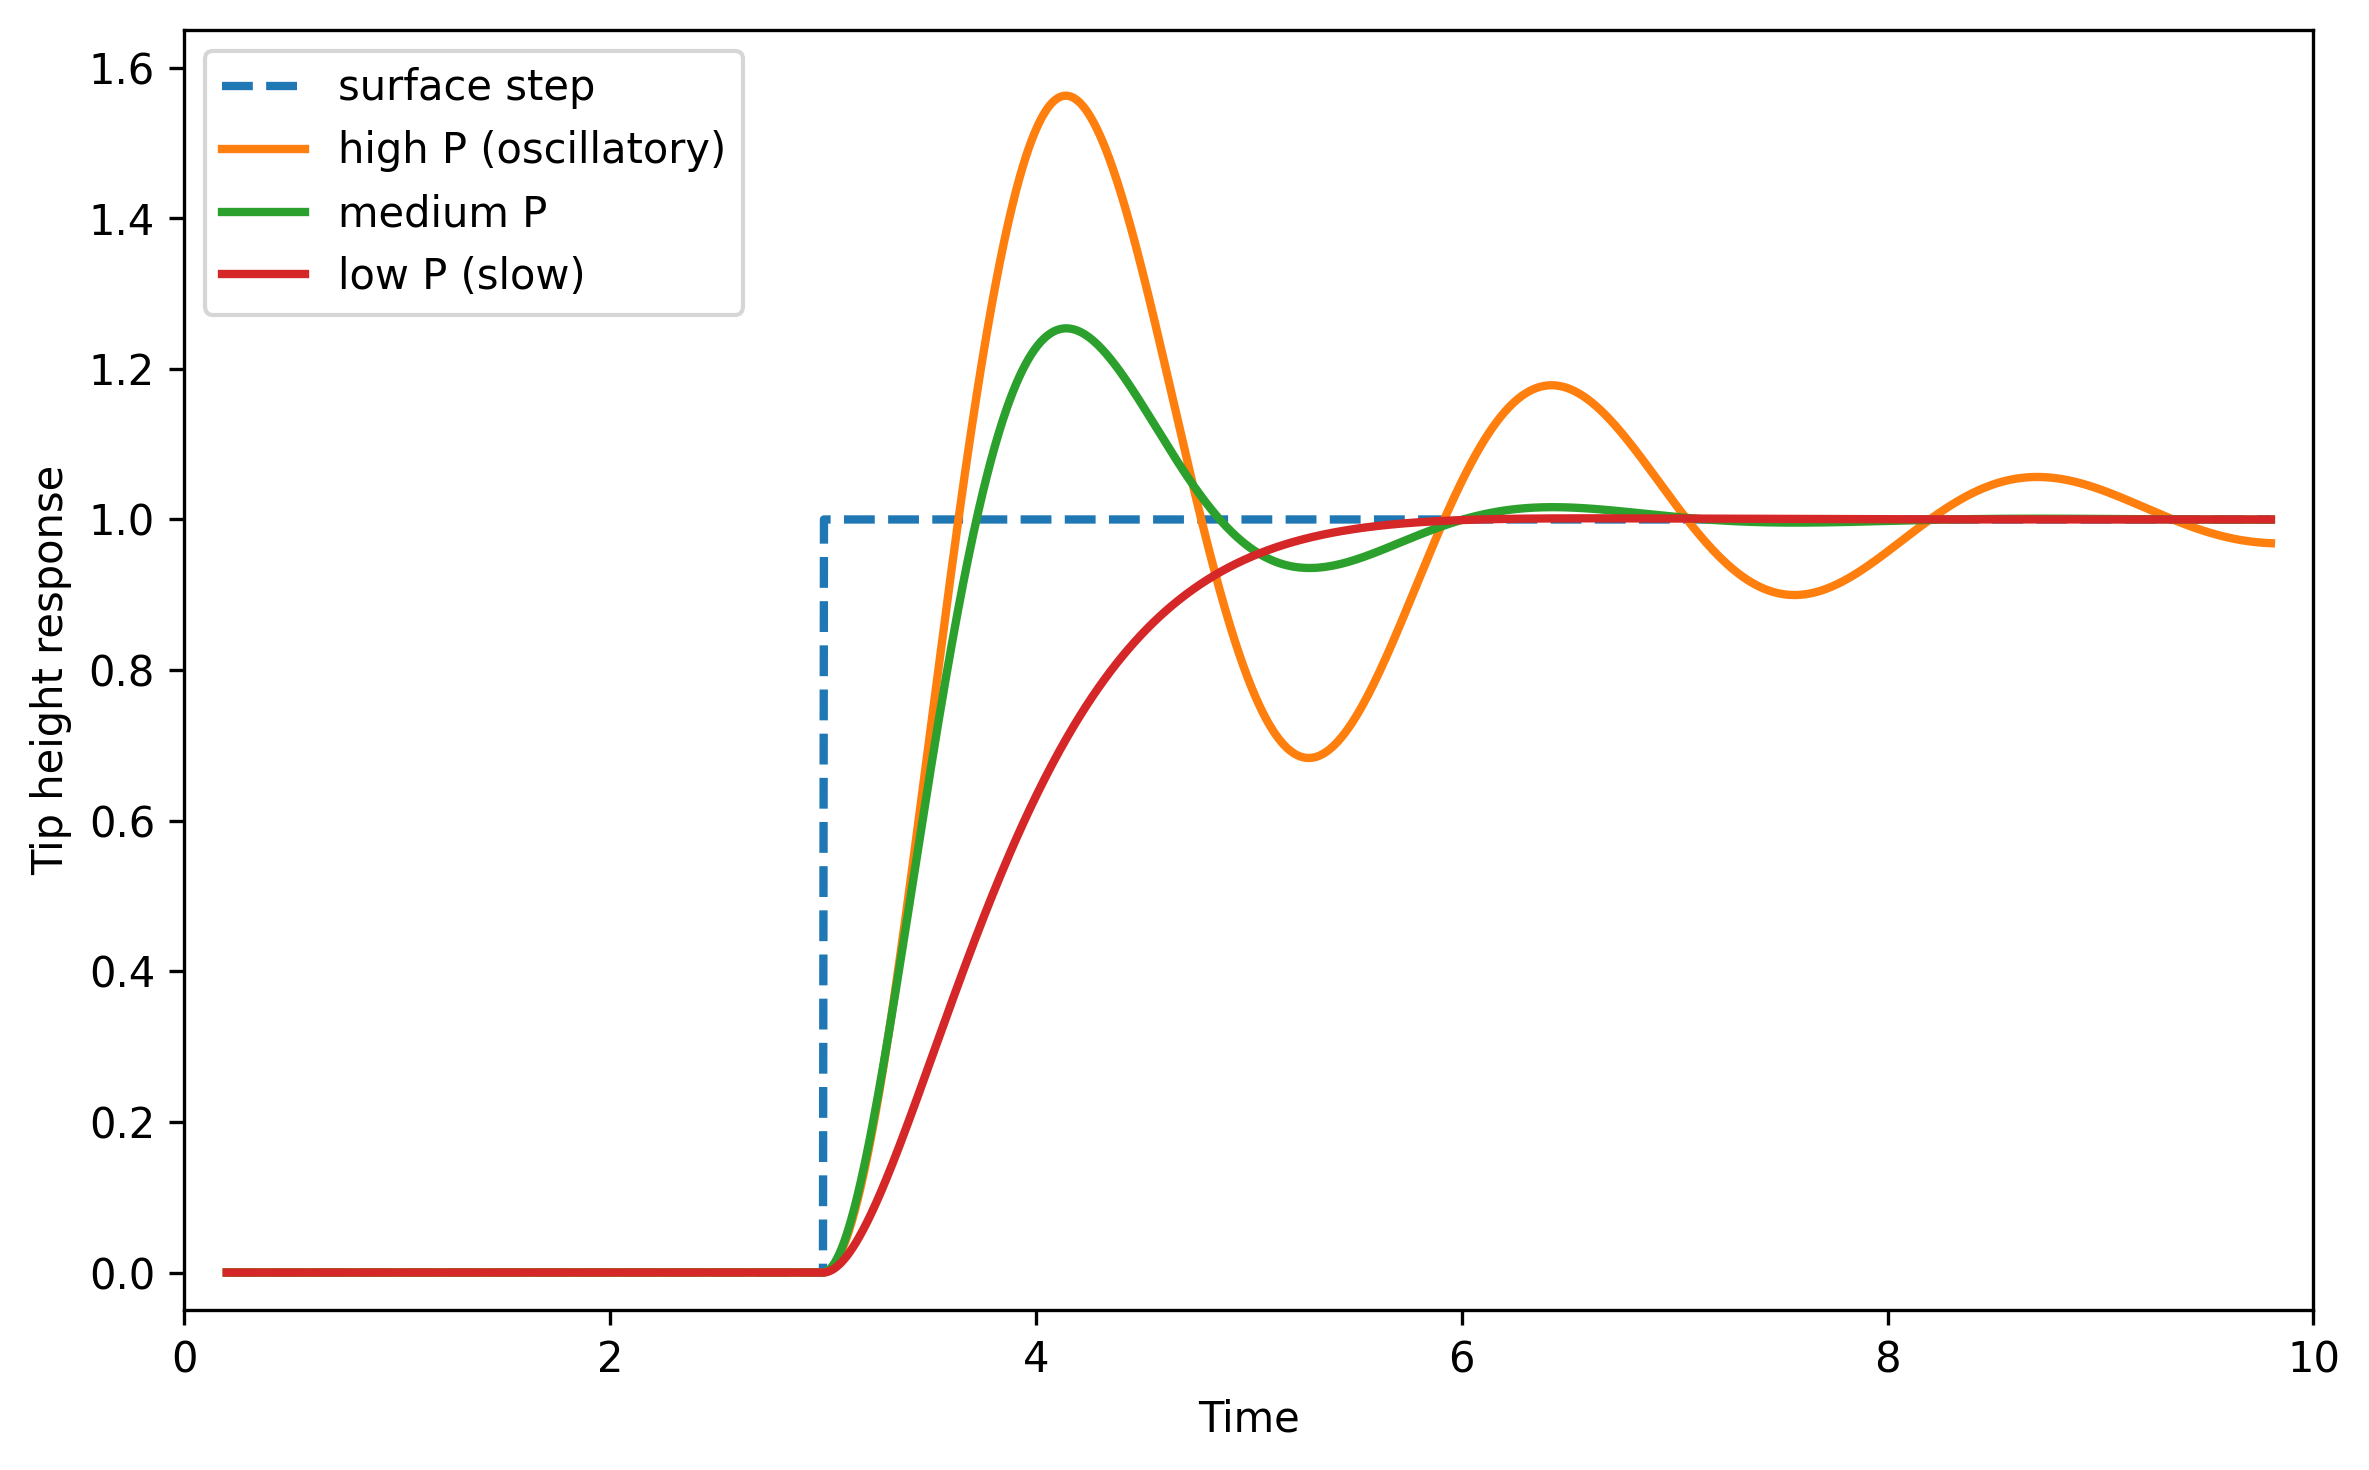

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis
t = np.linspace(0.2, 9.8, 2000)
t_step = 3.0

# Surface step
surface = np.zeros_like(t)
surface[t >= t_step] = 1.0

# Step response function
def step_response(t, zeta, omega):
    y = np.zeros_like(t)
    mask = t >= t_step
    tau = t[mask] - t_step
    y[mask] = (
        1
        - np.exp(-zeta * omega * tau)
        * (
            np.cos(omega * np.sqrt(1 - zeta**2) * tau)
            + zeta / np.sqrt(1 - zeta**2)
            * np.sin(omega * np.sqrt(1 - zeta**2) * tau)
        )
    )
    return y

# Responses
high_P = step_response(t, zeta=0.18, omega=2.8)
medium_P = step_response(t, zeta=0.4, omega=3.0)
low_P = step_response(t, zeta=0.9, omega=2.0)

# Plot
plt.figure(figsize=(8, 5), dpi=300)
plt.plot(t, surface, linestyle="--", linewidth=2, label="surface step")
plt.plot(t, high_P, linewidth=2, label="high P (oscillatory)")
plt.plot(t, medium_P, linewidth=2, label="medium P")
plt.plot(t, low_P, linewidth=2, label="low P (slow)")

plt.xlabel("Time")
plt.ylabel("Tip height response")
plt.xlim(0.0, 10)
plt.ylim(-0.05, 1.65)
plt.legend(loc='upper left')
plt.tight_layout()

plt.savefig("feedback_gain.png")
plt.show()
